In [2]:
import xmltodict
import pandas as pd
from collections import OrderedDict
import requests

# below is data gathering

In [3]:

#zcounter = 2008
#zcountstr = str(zcounter)

#headfilename = "taobao_zichan_yijieshu_" + zcountstr + ".html"

url = 'https://data.treasury.gov/feed.svc/DailyTreasuryYieldCurveRateData?$filter=year(NEW_DATE)%20eq%202018'
r = requests.get(url)
jsdata = xmltodict.parse(r.content)

initial_data = pd.DataFrame()

In [4]:
jsdata['feed']['entry'][0]

jsdata['feed']['entry'][161]['content']['m:properties']

date = jsdata['feed']['entry'][1]['content']['m:properties']['d:NEW_DATE']['#text']

date

type(date)

one_mon = jsdata['feed']['entry'][1]['content']['m:properties']['d:BC_1MONTH']['#text']

one_mon

three_mon = jsdata['feed']['entry'][1]['content']['m:properties']['d:BC_3MONTH']['#text']

six_mon = jsdata['feed']['entry'][1]['content']['m:properties']['d:BC_6MONTH']['#text']

six_mon

ten_yr = jsdata['feed']['entry'][1]['content']['m:properties']['d:BC_10YEAR']['#text']

twenty_yr = jsdata['feed']['entry'][1]['content']['m:properties']['d:BC_20YEAR']['#text']

thrity_yr = jsdata['feed']['entry'][1]['content']['m:properties']['d:BC_30YEAR']['#text']

In [5]:
jsdata['feed']['entry'][96]['content']['m:properties']['d:NEW_DATE']

OrderedDict([('@m:type', 'Edm.DateTime'), ('#text', '2018-05-21T00:00:00')])

In [6]:
jsdata['feed']['entry'][96]['content']['m:properties']['d:BC_3MONTH'].keys()

odict_keys(['@m:type', '#text'])

In [7]:
a = '@m:null'
a in jsdata['feed']['entry'][96]['content']['m:properties']['d:BC_3MONTH'].keys()

False

In [8]:
jsdata['feed']['entry'][96]['content']['m:properties']

OrderedDict([('d:Id',
              OrderedDict([('@m:type', 'Edm.Int32'), ('#text', '7105')])),
             ('d:NEW_DATE',
              OrderedDict([('@m:type', 'Edm.DateTime'),
                           ('#text', '2018-05-21T00:00:00')])),
             ('d:BC_1MONTH',
              OrderedDict([('@m:type', 'Edm.Double'), ('#text', '1.71')])),
             ('d:BC_2MONTH',
              OrderedDict([('@m:type', 'Edm.Double'), ('@m:null', 'true')])),
             ('d:BC_3MONTH',
              OrderedDict([('@m:type', 'Edm.Double'), ('#text', '1.93')])),
             ('d:BC_6MONTH',
              OrderedDict([('@m:type', 'Edm.Double'), ('#text', '2.14')])),
             ('d:BC_1YEAR',
              OrderedDict([('@m:type', 'Edm.Double'), ('#text', '2.35')])),
             ('d:BC_2YEAR',
              OrderedDict([('@m:type', 'Edm.Double'), ('#text', '2.58')])),
             ('d:BC_3YEAR',
              OrderedDict([('@m:type', 'Edm.Double'), ('#text', '2.73')])),
             ('d:BC_5

In [9]:
def treasury_data(url):
    r = requests.get(url)
    jsdata = xmltodict.parse(r.content)
    length = len(jsdata['feed']['entry'])

    data_dict_2018 = {}

    for x in range(1,length):
        rates = []
        date = jsdata['feed']['entry'][x]['content']['m:properties']['d:NEW_DATE']['#text']
        one_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_1MONTH']['#text']
        three_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_3MONTH']['#text']
        six_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_6MONTH']['#text']
        ten_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_10YEAR']['#text']
        twenty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_20YEAR']['#text']
        thirty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_30YEAR']['#text']
        rates.append(date)
        rates.append(one_mon)
        rates.append(three_mon)
        rates.append(six_mon)
        rates.append(ten_yr)
        rates.append(twenty_yr)
        rates.append(thirty_yr)

        data_dict_2018[x] = rates

    data_2018 = pd.DataFrame.from_dict(data_dict_2018,orient='index',columns=['date','one_mon','three_mon','six_mon',
                                                                         'ten_yr','twenty_yr','thirty_yr'])
    
    

In [10]:
url = 'https://data.treasury.gov/feed.svc/DailyTreasuryYieldCurveRateData?$filter=year(NEW_DATE)%20eq%202018'
r = requests.get(url)
jsdata = xmltodict.parse(r.content)
length = len(jsdata['feed']['entry'])

data_dict_2018 = {}

for x in range(1,length):
    rates = []
    date = jsdata['feed']['entry'][x]['content']['m:properties']['d:NEW_DATE']['#text']
    one_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_1MONTH']['#text']
    three_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_3MONTH']['#text']
    six_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_6MONTH']['#text']
    ten_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_10YEAR']['#text']
    twenty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_20YEAR']['#text']
    thirty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_30YEAR']['#text']
    rates.append(date)
    rates.append(one_mon)
    rates.append(three_mon)
    rates.append(six_mon)
    rates.append(ten_yr)
    rates.append(twenty_yr)
    rates.append(thirty_yr)
   
    data_dict_2018[x] = rates

data_2018 = pd.DataFrame.from_dict(data_dict_2018,orient='index',columns=['date','one_mon','three_mon','six_mon',
                                                                     'ten_yr','twenty_yr','thirty_yr'])

In [11]:
url = 'https://data.treasury.gov/feed.svc/DailyTreasuryYieldCurveRateData?$filter=year(NEW_DATE)%20eq%202017'
r = requests.get(url)
jsdata = xmltodict.parse(r.content)
length = len(jsdata['feed']['entry'])

data_dict_2017 = {}

for x in range(1,length):
    rates = []
    date = jsdata['feed']['entry'][x]['content']['m:properties']['d:NEW_DATE']['#text']
    one_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_1MONTH']['#text']
    three_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_3MONTH']['#text']
    six_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_6MONTH']['#text']
    ten_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_10YEAR']['#text']
    twenty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_20YEAR']['#text']
    thirty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_30YEAR']['#text']
    rates.append(date)
    rates.append(one_mon)
    rates.append(three_mon)
    rates.append(six_mon)
    rates.append(ten_yr)
    rates.append(twenty_yr)
    rates.append(thirty_yr)
   
    data_dict_2017[x] = rates

data_2017 = pd.DataFrame.from_dict(data_dict_2017,orient='index',columns=['date','one_mon','three_mon','six_mon',
                                                                     'ten_yr','twenty_yr','thirty_yr'])

In [12]:
url = 'https://data.treasury.gov/feed.svc/DailyTreasuryYieldCurveRateData?$filter=year(NEW_DATE)%20eq%202016'
r = requests.get(url)
jsdata = xmltodict.parse(r.content)
length = len(jsdata['feed']['entry'])

data_dict_2016 = {}

for x in range(1,length):
    rates = []
    date = jsdata['feed']['entry'][x]['content']['m:properties']['d:NEW_DATE']['#text']
    one_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_1MONTH']['#text']
    three_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_3MONTH']['#text']
    six_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_6MONTH']['#text']
    ten_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_10YEAR']['#text']
    twenty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_20YEAR']['#text']
    thirty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_30YEAR']['#text']
    rates.append(date)
    rates.append(one_mon)
    rates.append(three_mon)
    rates.append(six_mon)
    rates.append(ten_yr)
    rates.append(twenty_yr)
    rates.append(thirty_yr)
   
    data_dict_2016[x] = rates

data_2016 = pd.DataFrame.from_dict(data_dict_2016,orient='index',columns=['date','one_mon','three_mon','six_mon',
                                                                     'ten_yr','twenty_yr','thirty_yr'])

In [13]:
url = 'https://data.treasury.gov/feed.svc/DailyTreasuryYieldCurveRateData?$filter=year(NEW_DATE)%20eq%202015'
r = requests.get(url)
jsdata = xmltodict.parse(r.content)
length = len(jsdata['feed']['entry'])

data_dict_2015 = {}

for x in range(1,length):
    rates = []
    date = jsdata['feed']['entry'][x]['content']['m:properties']['d:NEW_DATE']['#text']
    one_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_1MONTH']['#text']
    three_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_3MONTH']['#text']
    six_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_6MONTH']['#text']
    ten_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_10YEAR']['#text']
    twenty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_20YEAR']['#text']
    thirty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_30YEAR']['#text']
    rates.append(date)
    rates.append(one_mon)
    rates.append(three_mon)
    rates.append(six_mon)
    rates.append(ten_yr)
    rates.append(twenty_yr)
    rates.append(thirty_yr)
   
    data_dict_2015[x] = rates

data_2015 = pd.DataFrame.from_dict(data_dict_2015,orient='index',columns=['date','one_mon','three_mon','six_mon',
                                                                     'ten_yr','twenty_yr','thirty_yr'])

In [14]:
url = 'https://data.treasury.gov/feed.svc/DailyTreasuryYieldCurveRateData?$filter=year(NEW_DATE)%20eq%202014'
r = requests.get(url)
jsdata = xmltodict.parse(r.content)
length = len(jsdata['feed']['entry'])

data_dict_2014 = {}

for x in range(1,length):
    rates = []
    date = jsdata['feed']['entry'][x]['content']['m:properties']['d:NEW_DATE']['#text']
    one_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_1MONTH']['#text']
    three_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_3MONTH']['#text']
    six_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_6MONTH']['#text']
    ten_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_10YEAR']['#text']
    twenty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_20YEAR']['#text']
    thirty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_30YEAR']['#text']
    rates.append(date)
    rates.append(one_mon)
    rates.append(three_mon)
    rates.append(six_mon)
    rates.append(ten_yr)
    rates.append(twenty_yr)
    rates.append(thirty_yr)
   
    data_dict_2014[x] = rates

data_2014 = pd.DataFrame.from_dict(data_dict_2014,orient='index',columns=['date','one_mon','three_mon','six_mon',
                                                                     'ten_yr','twenty_yr','thirty_yr'])

In [15]:
url = 'https://data.treasury.gov/feed.svc/DailyTreasuryYieldCurveRateData?$filter=year(NEW_DATE)%20eq%202013'
r = requests.get(url)
jsdata = xmltodict.parse(r.content)
length = len(jsdata['feed']['entry'])

data_dict_2013 = {}

for x in range(1,length):
    rates = []
    date = jsdata['feed']['entry'][x]['content']['m:properties']['d:NEW_DATE']['#text']
    one_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_1MONTH']['#text']
    three_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_3MONTH']['#text']
    six_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_6MONTH']['#text']
    ten_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_10YEAR']['#text']
    twenty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_20YEAR']['#text']
    thirty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_30YEAR']['#text']
    rates.append(date)
    rates.append(one_mon)
    rates.append(three_mon)
    rates.append(six_mon)
    rates.append(ten_yr)
    rates.append(twenty_yr)
    rates.append(thirty_yr)
   
    data_dict_2013[x] = rates

data_2013 = pd.DataFrame.from_dict(data_dict_2013,orient='index',columns=['date','one_mon','three_mon','six_mon',
                                                                     'ten_yr','twenty_yr','thirty_yr'])

In [16]:
url = 'https://data.treasury.gov/feed.svc/DailyTreasuryYieldCurveRateData?$filter=year(NEW_DATE)%20eq%202012'
r = requests.get(url)
jsdata = xmltodict.parse(r.content)
length = len(jsdata['feed']['entry'])

data_dict_2012 = {}

for x in range(1,length):
    rates = []
    date = jsdata['feed']['entry'][x]['content']['m:properties']['d:NEW_DATE']['#text']
    one_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_1MONTH']['#text']
    three_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_3MONTH']['#text']
    six_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_6MONTH']['#text']
    ten_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_10YEAR']['#text']
    twenty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_20YEAR']['#text']
    thirty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_30YEAR']['#text']
    rates.append(date)
    rates.append(one_mon)
    rates.append(three_mon)
    rates.append(six_mon)
    rates.append(ten_yr)
    rates.append(twenty_yr)
    rates.append(thirty_yr)
   
    data_dict_2012[x] = rates

data_2012 = pd.DataFrame.from_dict(data_dict_2012,orient='index',columns=['date','one_mon','three_mon','six_mon',
                                                                     'ten_yr','twenty_yr','thirty_yr'])

In [17]:
url = 'https://data.treasury.gov/feed.svc/DailyTreasuryYieldCurveRateData?$filter=year(NEW_DATE)%20eq%202011'
r = requests.get(url)
jsdata = xmltodict.parse(r.content)
length = len(jsdata['feed']['entry'])

data_dict_2011 = {}

for x in range(1,length):
    rates = []
    date = jsdata['feed']['entry'][x]['content']['m:properties']['d:NEW_DATE']['#text']
    one_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_1MONTH']['#text']
    three_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_3MONTH']['#text']
    six_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_6MONTH']['#text']
    ten_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_10YEAR']['#text']
    twenty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_20YEAR']['#text']
    thirty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_30YEAR']['#text']
    rates.append(date)
    rates.append(one_mon)
    rates.append(three_mon)
    rates.append(six_mon)
    rates.append(ten_yr)
    rates.append(twenty_yr)
    rates.append(thirty_yr)
   
    data_dict_2011[x] = rates

data_2011 = pd.DataFrame.from_dict(data_dict_2011,orient='index',columns=['date','one_mon','three_mon','six_mon',
                                                                     'ten_yr','twenty_yr','thirty_yr'])

In [18]:
url = 'https://data.treasury.gov/feed.svc/DailyTreasuryYieldCurveRateData?$filter=year(NEW_DATE)%20eq%202010'
r = requests.get(url)
jsdata = xmltodict.parse(r.content)
length = len(jsdata['feed']['entry'])

data_dict_2010 = {}


for x in range(1,96):
    rates = []
    date = jsdata['feed']['entry'][x]['content']['m:properties']['d:NEW_DATE']['#text']
    one_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_1MONTH']['#text']
    three_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_3MONTH']['#text']
    six_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_6MONTH']['#text']
    ten_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_10YEAR']['#text']
    twenty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_20YEAR']['#text']
    thirty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_30YEAR']['#text']
    rates.append(date)
    rates.append(one_mon)
    rates.append(three_mon)
    rates.append(six_mon)
    rates.append(ten_yr)
    rates.append(twenty_yr)
    rates.append(thirty_yr)
   
    data_dict_2010[x] = rates
    
for x in range(97,length):
    rates = []
    date = jsdata['feed']['entry'][x]['content']['m:properties']['d:NEW_DATE']['#text']
    one_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_1MONTH']['#text']
    three_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_3MONTH']['#text']
    six_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_6MONTH']['#text']
    ten_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_10YEAR']['#text']
    twenty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_20YEAR']['#text']
    thirty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_30YEAR']['#text']
    rates.append(date)
    rates.append(one_mon)
    rates.append(three_mon)
    rates.append(six_mon)
    rates.append(ten_yr)
    rates.append(twenty_yr)
    rates.append(thirty_yr)
   
    data_dict_2010[x] = rates

data_2010 = pd.DataFrame.from_dict(data_dict_2010,orient='index',columns=['date','one_mon','three_mon','six_mon',
                                                                     'ten_yr','twenty_yr','thirty_yr'])

In [19]:
url = 'https://data.treasury.gov/feed.svc/DailyTreasuryYieldCurveRateData?$filter=year(NEW_DATE)%20eq%202009'
r = requests.get(url)
jsdata = xmltodict.parse(r.content)
length = len(jsdata['feed']['entry'])

data_dict_2009 = {}

for x in range(1,length):
    rates = []
    date = jsdata['feed']['entry'][x]['content']['m:properties']['d:NEW_DATE']['#text']
    one_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_1MONTH']['#text']
    three_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_3MONTH']['#text']
    six_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_6MONTH']['#text']
    ten_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_10YEAR']['#text']
    twenty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_20YEAR']['#text']
    thirty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_30YEAR']['#text']
    rates.append(date)
    rates.append(one_mon)
    rates.append(three_mon)
    rates.append(six_mon)
    rates.append(ten_yr)
    rates.append(twenty_yr)
    rates.append(thirty_yr)
   
    data_dict_2009[x] = rates

data_2009 = pd.DataFrame.from_dict(data_dict_2009,orient='index',columns=['date','one_mon','three_mon','six_mon',
                                                                     'ten_yr','twenty_yr','thirty_yr'])

In [20]:
url = 'https://data.treasury.gov/feed.svc/DailyTreasuryYieldCurveRateData?$filter=year(NEW_DATE)%20eq%202008'
r = requests.get(url)
jsdata = xmltodict.parse(r.content)
length = len(jsdata['feed']['entry'])

data_dict_2008 = {}


for x in range(1,137):
    rates = []
    date = jsdata['feed']['entry'][x]['content']['m:properties']['d:NEW_DATE']['#text']
    one_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_1MONTH']['#text']
    three_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_3MONTH']['#text']
    six_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_6MONTH']['#text']
    ten_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_10YEAR']['#text']
    twenty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_20YEAR']['#text']
    thirty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_30YEAR']['#text']
    rates.append(date)
    rates.append(one_mon)
    rates.append(three_mon)
    rates.append(six_mon)
    rates.append(ten_yr)
    rates.append(twenty_yr)
    rates.append(thirty_yr)
   
    data_dict_2008[x] = rates


for x in range(138,144):
    rates = []
    date = jsdata['feed']['entry'][x]['content']['m:properties']['d:NEW_DATE']['#text']
    one_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_1MONTH']['#text']
    three_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_3MONTH']['#text']
    six_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_6MONTH']['#text']
    ten_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_10YEAR']['#text']
    twenty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_20YEAR']['#text']
    thirty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_30YEAR']['#text']
    rates.append(date)
    rates.append(one_mon)
    rates.append(three_mon)
    rates.append(six_mon)
    rates.append(ten_yr)
    rates.append(twenty_yr)
    rates.append(thirty_yr)
   
    data_dict_2008[x] = rates
    
for x in range(145,161):
    rates = []
    date = jsdata['feed']['entry'][x]['content']['m:properties']['d:NEW_DATE']['#text']
    one_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_1MONTH']['#text']
    three_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_3MONTH']['#text']
    six_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_6MONTH']['#text']
    ten_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_10YEAR']['#text']
    twenty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_20YEAR']['#text']
    thirty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_30YEAR']['#text']
    rates.append(date)
    rates.append(one_mon)
    rates.append(three_mon)
    rates.append(six_mon)
    rates.append(ten_yr)
    rates.append(twenty_yr)
    rates.append(thirty_yr)
   
    data_dict_2008[x] = rates

for x in range(162,251):
    rates = []
    date = jsdata['feed']['entry'][x]['content']['m:properties']['d:NEW_DATE']['#text']
    one_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_1MONTH']['#text']
    three_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_3MONTH']['#text']
    six_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_6MONTH']['#text']
    ten_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_10YEAR']['#text']
    twenty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_20YEAR']['#text']
    thirty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_30YEAR']['#text']
    rates.append(date)
    rates.append(one_mon)
    rates.append(three_mon)
    rates.append(six_mon)
    rates.append(ten_yr)
    rates.append(twenty_yr)
    rates.append(thirty_yr)
   
    data_dict_2008[x] = rates

data_2008 = pd.DataFrame.from_dict(data_dict_2008,orient='index',columns=['date','one_mon','three_mon','six_mon',
                                                                     'ten_yr','twenty_yr','thirty_yr'])

In [21]:
jsdata['feed']['entry'][144]['content']['m:properties']['d:BC_3MONTH'].keys()

odict_keys(['@m:type', '@m:null'])

In [22]:
'@m:null' in jsdata['feed']['entry'][137]['content']['m:properties']['d:BC_3MONTH'].keys()

True

In [23]:
1 in jsdata['feed']['entry'][137]['content']['m:properties']['d:BC_3MONTH'].keys()

False

In [24]:
jsdata['feed']['entry'][161]['content']['m:properties']

OrderedDict([('d:Id',
              OrderedDict([('@m:type', 'Edm.Int32'), ('#text', '3689')])),
             ('d:NEW_DATE',
              OrderedDict([('@m:type', 'Edm.DateTime'),
                           ('#text', '2008-12-10T00:00:00')])),
             ('d:BC_1MONTH',
              OrderedDict([('@m:type', 'Edm.Double'), ('#text', '0')])),
             ('d:BC_2MONTH',
              OrderedDict([('@m:type', 'Edm.Double'), ('@m:null', 'true')])),
             ('d:BC_3MONTH',
              OrderedDict([('@m:type', 'Edm.Double'), ('@m:null', 'true')])),
             ('d:BC_6MONTH',
              OrderedDict([('@m:type', 'Edm.Double'),
                           ('#text', '0.20999999344348907')])),
             ('d:BC_1YEAR',
              OrderedDict([('@m:type', 'Edm.Double'),
                           ('#text', '0.49000000953674316')])),
             ('d:BC_2YEAR',
              OrderedDict([('@m:type', 'Edm.Double'),
                           ('#text', '0.86000001430511475')])),


# below is data compilation and initial engineering

In [25]:
data_2018.head()

,date,one_mon,three_mon,six_mon,ten_yr,twenty_yr,thirty_yr
1,2018-01-03T00:00:00,1.29,1.41,1.59,2.44,2.62,2.78
2,2018-01-04T00:00:00,1.28,1.41,1.6,2.46,2.62,2.79
3,2018-01-05T00:00:00,1.27,1.39,1.58,2.47,2.64,2.81
4,2018-01-08T00:00:00,1.3,1.45,1.6,2.49,2.65,2.81
5,2018-01-09T00:00:00,1.27,1.44,1.6,2.55,2.72,2.88


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
treasury = pd.concat([data_2018,data_2017,data_2016,data_2015,data_2014,data_2013,
           data_2012,data_2011,data_2010,data_2009,data_2008])

In [28]:
treasury.shape

(2739, 7)

In [29]:
treasury['market_day'] = pd.to_datetime(treasury.date)
treasury = treasury.set_index('market_day')

treasury = treasury.drop('date',axis=1)

In [30]:
treasury.dtypes

one_mon      object
three_mon    object
six_mon      object
ten_yr       object
twenty_yr    object
thirty_yr    object
dtype: object

In [31]:
treasury = treasury.convert_objects(convert_numeric=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [32]:
treasury['10yr1mon'] = treasury.ten_yr - treasury.one_mon
treasury['10yr3mon'] = treasury.ten_yr - treasury.three_mon
treasury['10yr6mon'] = treasury.ten_yr - treasury.six_mon
treasury['20yr1mon'] = treasury.twenty_yr - treasury.one_mon
treasury['20yr3mon'] = treasury.twenty_yr - treasury.three_mon
treasury['20yr6mon'] = treasury.twenty_yr - treasury.six_mon
treasury['30yr1mon'] = treasury.thirty_yr - treasury.one_mon
treasury['30yr3mon'] = treasury.thirty_yr - treasury.three_mon
treasury['30yr6mon'] = treasury.thirty_yr - treasury.six_mon

In [33]:
treasury.head()

,one_mon,three_mon,six_mon,ten_yr,twenty_yr,thirty_yr,10yr1mon,10yr3mon,10yr6mon,20yr1mon,20yr3mon,20yr6mon,30yr1mon,30yr3mon,30yr6mon
market_day,,,,,,,,,,,,,,,
2018-01-03,1.29,1.41,1.59,2.44,2.62,2.78,1.15,1.03,0.85,1.33,1.21,1.03,1.49,1.37,1.19
2018-01-04,1.28,1.41,1.60,2.46,2.62,2.79,1.18,1.05,0.86,1.34,1.21,1.02,1.51,1.38,1.19
2018-01-05,1.27,1.39,1.58,2.47,2.64,2.81,1.20,1.08,0.89,1.37,1.25,1.06,1.54,1.42,1.23
2018-01-08,1.30,1.45,1.60,2.49,2.65,2.81,1.19,1.04,0.89,1.35,1.20,1.05,1.51,1.36,1.21
2018-01-09,1.27,1.44,1.60,2.55,2.72,2.88,1.28,1.11,0.95,1.45,1.28,1.12,1.61,1.44,1.28


In [34]:
treasury.columns

Index(['one_mon', 'three_mon', 'six_mon', 'ten_yr', 'twenty_yr', 'thirty_yr',
       '10yr1mon', '10yr3mon', '10yr6mon', '20yr1mon', '20yr3mon', '20yr6mon',
       '30yr1mon', '30yr3mon', '30yr6mon'],
      dtype='object')

 # below is SP500 data compilation and engineering













In [35]:
sp_cols = ['market_day','sp_open','sp_high','sp_low','sp_close','sp_adj_close','sp_volume']
sp = pd.read_csv('SP500.csv', header=0, names=sp_cols)

In [36]:
sp.shape

(2782, 7)

In [37]:
sp.head()

,market_day,sp_open,sp_high,sp_low,sp_close,sp_adj_close,sp_volume
0,2008-01-02,1467.969971,1471.770020,1442.069946,1447.160034,1447.160034,3452650000
1,2008-01-03,1447.550049,1456.800049,1443.729980,1447.160034,1447.160034,3429500000
2,2008-01-04,1444.010010,1444.010010,1411.189941,1411.630005,1411.630005,4166000000
3,2008-01-07,1414.069946,1423.869995,1403.449951,1416.180054,1416.180054,4221260000
4,2008-01-08,1415.709961,1430.280029,1388.300049,1390.189941,1390.189941,4705390000


In [38]:
sp = sp.set_index('market_day')

In [39]:
sp.head()

,sp_open,sp_high,sp_low,sp_close,sp_adj_close,sp_volume
market_day,,,,,,
2008-01-02,1467.969971,1471.770020,1442.069946,1447.160034,1447.160034,3452650000
2008-01-03,1447.550049,1456.800049,1443.729980,1447.160034,1447.160034,3429500000
2008-01-04,1444.010010,1444.010010,1411.189941,1411.630005,1411.630005,4166000000
2008-01-07,1414.069946,1423.869995,1403.449951,1416.180054,1416.180054,4221260000
2008-01-08,1415.709961,1430.280029,1388.300049,1390.189941,1390.189941,4705390000


# below is vix data compilation and engineering






In [40]:
vix_cols = ['market_day','vix_open','vix_high','vix_low','vix_close']
vix = pd.read_csv('vix.csv', header=0, names=vix_cols)

In [41]:
vix.head()

,market_day,vix_open,vix_high,vix_low,vix_close
0,1/2/04,17.96,18.68,17.54,18.22
1,1/5/04,18.45,18.49,17.44,17.49
2,1/6/04,17.66,17.67,16.19,16.73
3,1/7/04,16.72,16.75,15.50,15.50
4,1/8/04,15.42,15.68,15.32,15.61


In [42]:
vix = vix.set_index('market_day')

In [43]:
vix.head()

,vix_open,vix_high,vix_low,vix_close
market_day,,,,
1/2/04,17.96,18.68,17.54,18.22
1/5/04,18.45,18.49,17.44,17.49
1/6/04,17.66,17.67,16.19,16.73
1/7/04,16.72,16.75,15.50,15.50
1/8/04,15.42,15.68,15.32,15.61


# this is mega database

In [44]:
mega = pd.merge(treasury,sp,left_index=True, right_index=True)

In [45]:
mega = pd.merge(mega,vix,left_index=True, right_index=True)

In [46]:
mega.head()

,one_mon,three_mon,six_mon,ten_yr,twenty_yr,thirty_yr,10yr1mon,10yr3mon,10yr6mon,20yr1mon,...,sp_open,sp_high,sp_low,sp_close,sp_adj_close,sp_volume,vix_open,vix_high,vix_low,vix_close
market_day,,,,,,,,,,,,,,,,,,,,,
2018-01-03,1.29,1.41,1.59,2.44,2.62,2.78,1.15,1.03,0.85,1.33,...,2697.850098,2714.370117,2697.770020,2713.060059,2713.060059,3538660000,9.56,9.65,8.94,9.15
2018-01-04,1.28,1.41,1.60,2.46,2.62,2.79,1.18,1.05,0.86,1.34,...,2719.310059,2729.290039,2719.070068,2723.989990,2723.989990,3695260000,9.01,9.31,8.92,9.22
2018-01-05,1.27,1.39,1.58,2.47,2.64,2.81,1.20,1.08,0.89,1.37,...,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3236620000,9.10,9.54,9.00,9.22
2018-01-08,1.30,1.45,1.60,2.49,2.65,2.81,1.19,1.04,0.89,1.35,...,2742.669922,2748.510010,2737.600098,2747.709961,2747.709961,3242650000,9.61,9.89,9.32,9.52
2018-01-09,1.27,1.44,1.60,2.55,2.72,2.88,1.28,1.11,0.95,1.45,...,2751.149902,2759.139893,2747.860107,2751.290039,2751.290039,3453480000,9.41,10.09,9.37,10.08


# below is second round of data engineering

In [47]:
mega['sp_previous'] = mega['sp_close'].shift(1)

mega['sp_change'] = (mega['sp_close'] - mega['sp_previous'])

mega['vix_previous'] = mega['vix_close'].shift(1)

mega['vix_change'] = (mega['vix_close'] - mega['vix_previous'])

mega['sp_volume_previous'] = mega['sp_volume'].shift(1)

mega['sp_volume_change'] = (mega['sp_volume'] - mega['sp_volume_previous'])

In [48]:
mega.head()

,one_mon,three_mon,six_mon,ten_yr,twenty_yr,thirty_yr,10yr1mon,10yr3mon,10yr6mon,20yr1mon,...,vix_open,vix_high,vix_low,vix_close,sp_previous,sp_change,vix_previous,vix_change,sp_volume_previous,sp_volume_change
market_day,,,,,,,,,,,,,,,,,,,,,
2018-01-03,1.29,1.41,1.59,2.44,2.62,2.78,1.15,1.03,0.85,1.33,...,9.56,9.65,8.94,9.15,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,1.28,1.41,1.60,2.46,2.62,2.79,1.18,1.05,0.86,1.34,...,9.01,9.31,8.92,9.22,2713.060059,10.929931,9.15,0.07,3.538660e+09,156600000.0
2018-01-05,1.27,1.39,1.58,2.47,2.64,2.81,1.20,1.08,0.89,1.37,...,9.10,9.54,9.00,9.22,2723.989990,19.159912,9.22,0.00,3.695260e+09,-458640000.0
2018-01-08,1.30,1.45,1.60,2.49,2.65,2.81,1.19,1.04,0.89,1.35,...,9.61,9.89,9.32,9.52,2743.149902,4.560059,9.22,0.30,3.236620e+09,6030000.0
2018-01-09,1.27,1.44,1.60,2.55,2.72,2.88,1.28,1.11,0.95,1.45,...,9.41,10.09,9.37,10.08,2747.709961,3.580078,9.52,0.56,3.242650e+09,210830000.0


In [49]:
data = mega[['10yr1mon', '10yr3mon', '10yr6mon', '20yr1mon', 
                '20yr3mon', '20yr6mon','30yr1mon', '30yr3mon', '30yr6mon',
                'vix_close','sp_close','sp_volume',
                'vix_change','sp_change','sp_volume_change']]

In [50]:
data.head()

,10yr1mon,10yr3mon,10yr6mon,20yr1mon,20yr3mon,20yr6mon,30yr1mon,30yr3mon,30yr6mon,vix_close,sp_close,sp_volume,vix_change,sp_change,sp_volume_change
market_day,,,,,,,,,,,,,,,
2018-01-03,1.15,1.03,0.85,1.33,1.21,1.03,1.49,1.37,1.19,9.15,2713.060059,3538660000,NaN,NaN,NaN
2018-01-04,1.18,1.05,0.86,1.34,1.21,1.02,1.51,1.38,1.19,9.22,2723.989990,3695260000,0.07,10.929931,156600000.0
2018-01-05,1.20,1.08,0.89,1.37,1.25,1.06,1.54,1.42,1.23,9.22,2743.149902,3236620000,0.00,19.159912,-458640000.0
2018-01-08,1.19,1.04,0.89,1.35,1.20,1.05,1.51,1.36,1.21,9.52,2747.709961,3242650000,0.30,4.560059,6030000.0
2018-01-09,1.28,1.11,0.95,1.45,1.28,1.12,1.61,1.44,1.28,10.08,2751.290039,3453480000,0.56,3.580078,210830000.0


# below is some EDA



In [51]:
data.dtypes

10yr1mon            float64
10yr3mon            float64
10yr6mon            float64
20yr1mon            float64
20yr3mon            float64
20yr6mon            float64
30yr1mon            float64
30yr3mon            float64
30yr6mon            float64
vix_close           float64
sp_close            float64
sp_volume             int64
vix_change          float64
sp_change           float64
sp_volume_change    float64
dtype: object

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2734 entries, 2018-01-03 to 2008-08-06
Data columns (total 15 columns):
10yr1mon            2734 non-null float64
10yr3mon            2734 non-null float64
10yr6mon            2734 non-null float64
20yr1mon            2734 non-null float64
20yr3mon            2734 non-null float64
20yr6mon            2734 non-null float64
30yr1mon            2734 non-null float64
30yr3mon            2734 non-null float64
30yr6mon            2734 non-null float64
vix_close           2734 non-null float64
sp_close            2734 non-null float64
sp_volume           2734 non-null int64
vix_change          2733 non-null float64
sp_change           2733 non-null float64
sp_volume_change    2733 non-null float64
dtypes: float64(14), int64(1)
memory usage: 341.8 KB


In [53]:
data.describe()                    

,10yr1mon,10yr3mon,10yr6mon,20yr1mon,20yr3mon,20yr6mon,30yr1mon,30yr3mon,30yr6mon,vix_close,sp_close,sp_volume,vix_change,sp_change,sp_volume_change
count,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2.734000e+03,2733.000000,2733.000000,2.733000e+03
mean,2.196324,2.147366,2.042191,2.782974,2.734016,2.628841,2.999221,2.950263,2.845088,19.725863,1717.106668,4.023844e+09,0.004054,-0.520992,4.883864e+05
std,0.762566,0.773088,0.784303,0.948366,0.963507,0.979095,0.924043,0.944748,0.969890,9.621979,564.137119,1.141021e+09,2.936786,36.204708,8.281767e+08
min,0.250000,0.240000,0.130000,0.430000,0.420000,0.310000,0.580000,0.550000,0.460000,9.140000,676.530029,1.025000e+09,-40.200000,-656.900146,-5.674100e+09
25%,1.590000,1.550000,1.470000,2.142500,2.100000,2.010000,2.450000,2.410000,2.302500,13.450000,1260.324951,3.321730e+09,-0.790000,-8.290039,-3.345600e+08
50%,2.115000,2.100000,1.970000,2.720000,2.720000,2.645000,3.000000,2.980000,2.880000,16.910000,1650.489990,3.751200e+09,-0.050000,0.650146,-7.680000e+06
75%,2.710000,2.660000,2.590000,3.520000,3.450000,3.360000,3.670000,3.640000,3.580000,22.640000,2102.127441,4.462808e+09,0.720000,10.280029,3.590200e+08
max,4.010000,3.830000,3.740000,4.640000,4.600000,4.510000,4.730000,4.700000,4.610000,80.860000,2930.750000,1.145623e+10,55.450000,488.130005,4.299510e+09


In [54]:
data.isnull().sum()

10yr1mon            0
10yr3mon            0
10yr6mon            0
20yr1mon            0
20yr3mon            0
20yr6mon            0
30yr1mon            0
30yr3mon            0
30yr6mon            0
vix_close           0
sp_close            0
sp_volume           0
vix_change          1
sp_change           1
sp_volume_change    1
dtype: int64

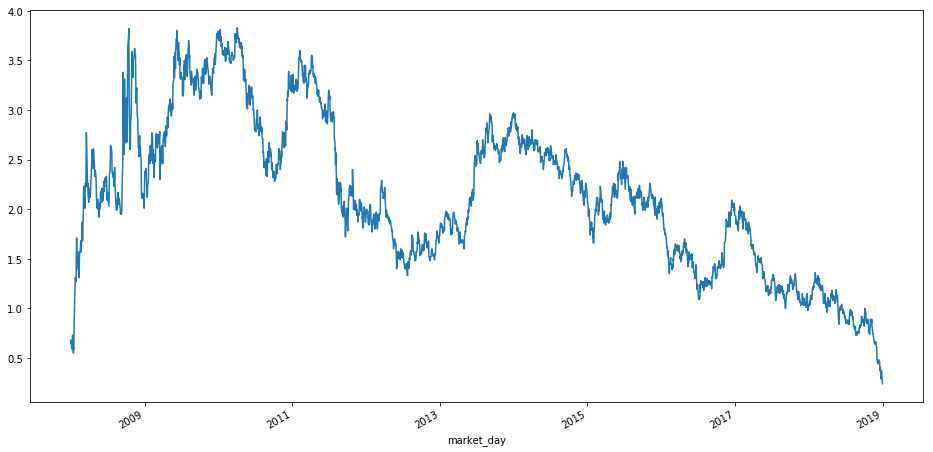

In [55]:
data['10yr3mon'].plot(figsize=(16,8))

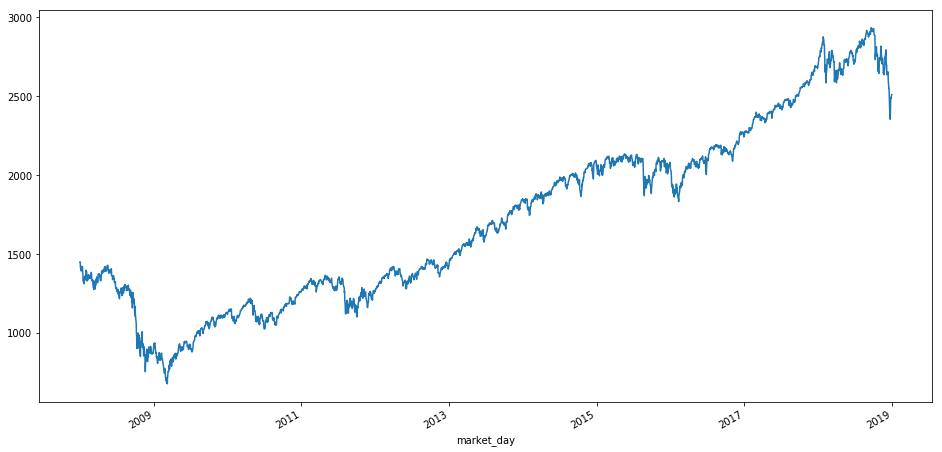

In [56]:
data['sp_close'].plot(figsize=(16,8))

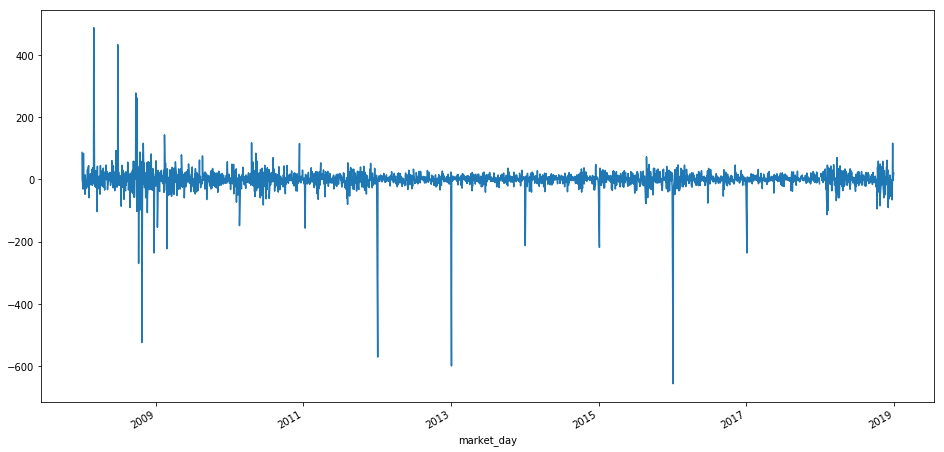

In [57]:
data['sp_change'].plot(figsize=(16,8))

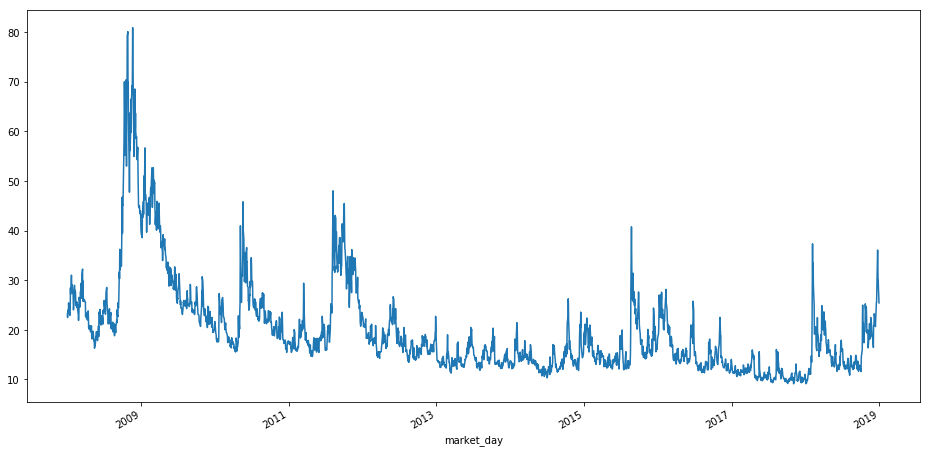

In [58]:
data['vix_close'].plot(figsize=(16,8))

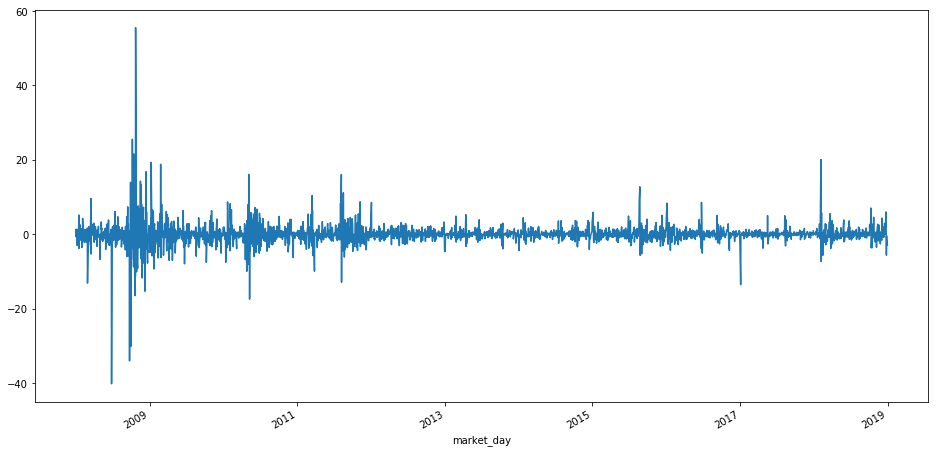

In [59]:
data['vix_change'].plot(figsize=(16,8))

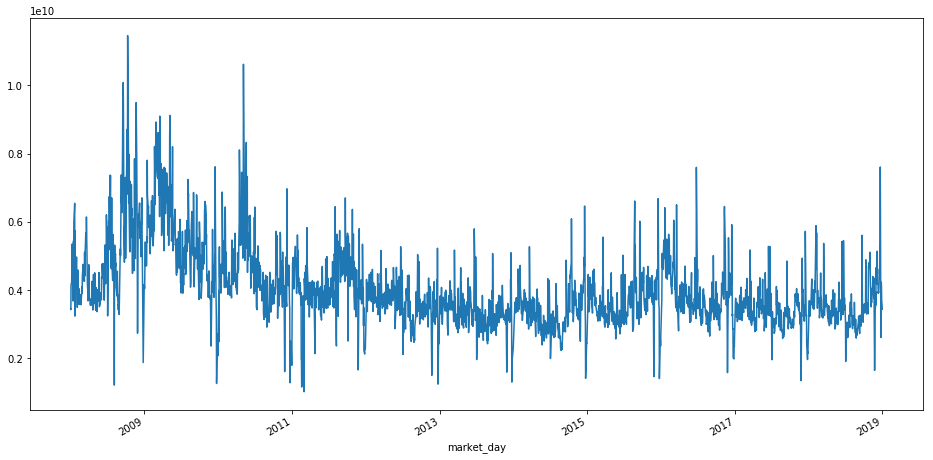

In [60]:
data['sp_volume'].plot(figsize=(16,8))

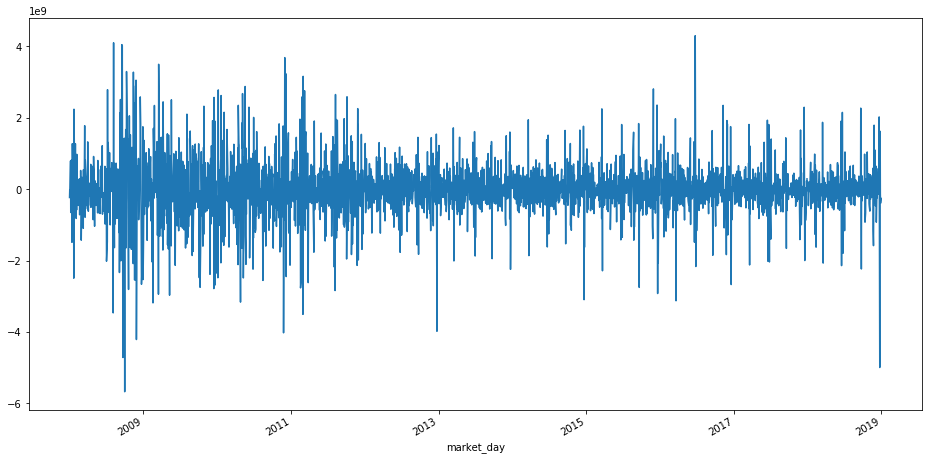

In [61]:
data['sp_volume_change'].plot(figsize=(16,8))

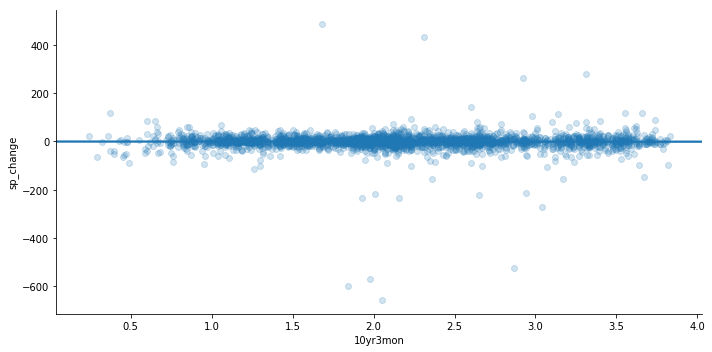

In [62]:
sns.lmplot(x='10yr3mon', y='sp_change', data=data, aspect=2, 
           scatter_kws={'alpha':0.2} );

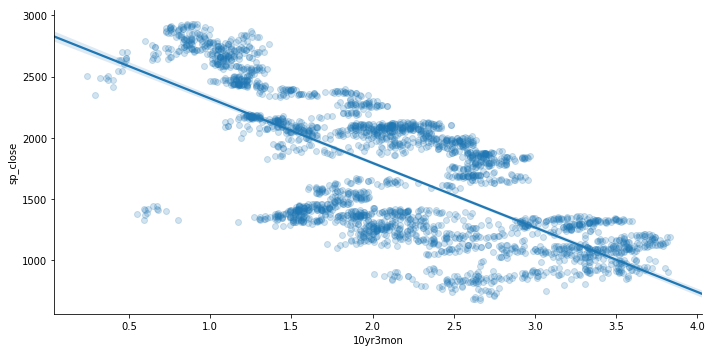

In [63]:
sns.lmplot(x='10yr3mon', y='sp_close', data=data, aspect=2, 
           scatter_kws={'alpha':0.2} );

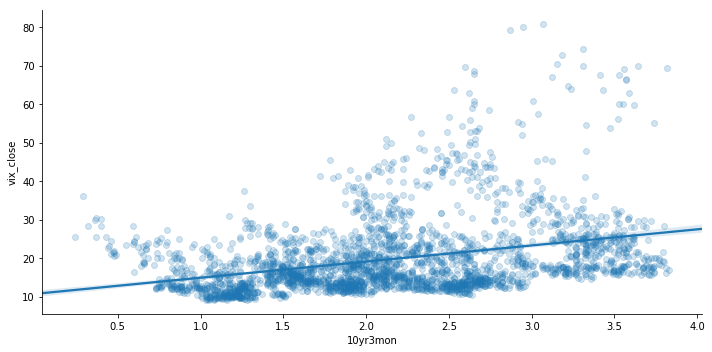

In [64]:
sns.lmplot(x='10yr3mon', y='vix_close', data=data, 
           aspect=2, scatter_kws={'alpha':0.2} );

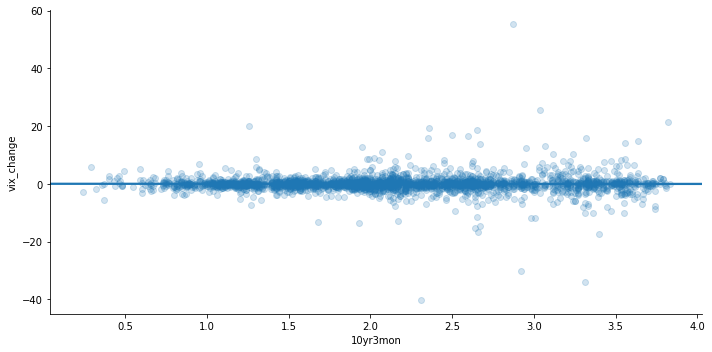

In [65]:
sns.lmplot(x='10yr3mon', y='vix_change', data=data, 
           aspect=2, scatter_kws={'alpha':0.2} );

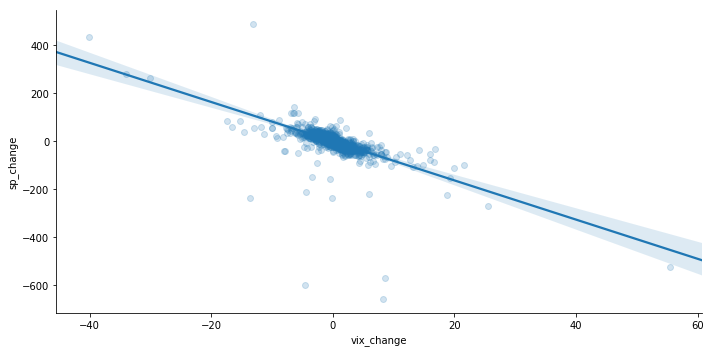

In [66]:
sns.lmplot(x='vix_change', y='sp_change', data=data, 
           aspect=2, scatter_kws={'alpha':0.2} );

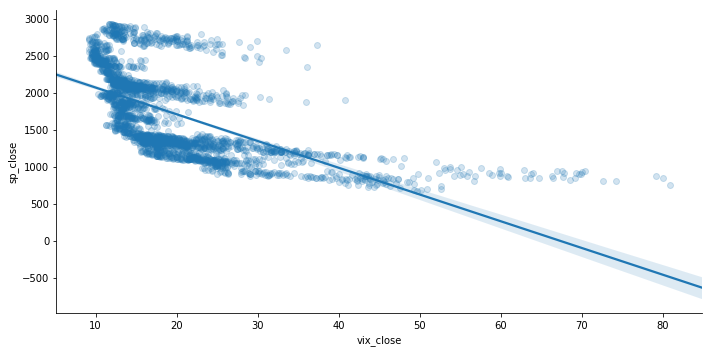

In [67]:
sns.lmplot(x='vix_close', y='sp_close', data=data, 
           aspect=2, scatter_kws={'alpha':0.2} );

In [68]:
data['vix_close_2'] = np.sqrt(np.sqrt(np.sqrt(data['vix_close'])))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
data.head()

,10yr1mon,10yr3mon,10yr6mon,20yr1mon,20yr3mon,20yr6mon,30yr1mon,30yr3mon,30yr6mon,vix_close,sp_close,sp_volume,vix_change,sp_change,sp_volume_change,vix_close_2
market_day,,,,,,,,,,,,,,,,
2018-01-03,1.15,1.03,0.85,1.33,1.21,1.03,1.49,1.37,1.19,9.15,2713.060059,3538660000,NaN,NaN,NaN,1.318796
2018-01-04,1.18,1.05,0.86,1.34,1.21,1.02,1.51,1.38,1.19,9.22,2723.989990,3695260000,0.07,10.929931,156600000.0,1.320053
2018-01-05,1.20,1.08,0.89,1.37,1.25,1.06,1.54,1.42,1.23,9.22,2743.149902,3236620000,0.00,19.159912,-458640000.0,1.320053
2018-01-08,1.19,1.04,0.89,1.35,1.20,1.05,1.51,1.36,1.21,9.52,2747.709961,3242650000,0.30,4.560059,6030000.0,1.325347
2018-01-09,1.28,1.11,0.95,1.45,1.28,1.12,1.61,1.44,1.28,10.08,2751.290039,3453480000,0.56,3.580078,210830000.0,1.334850


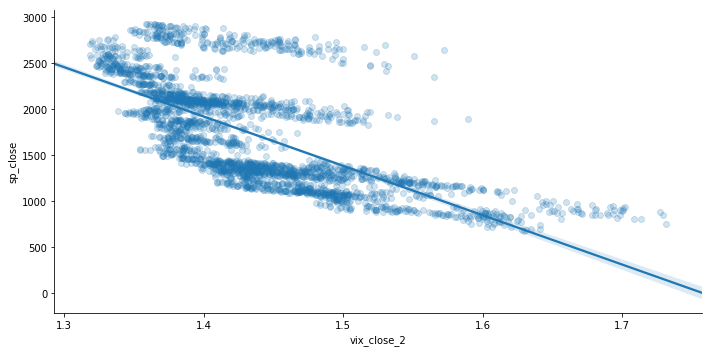

In [70]:
sns.lmplot(x='vix_close_2', y='sp_close', data=data, 
           aspect=2, scatter_kws={'alpha':0.2} );

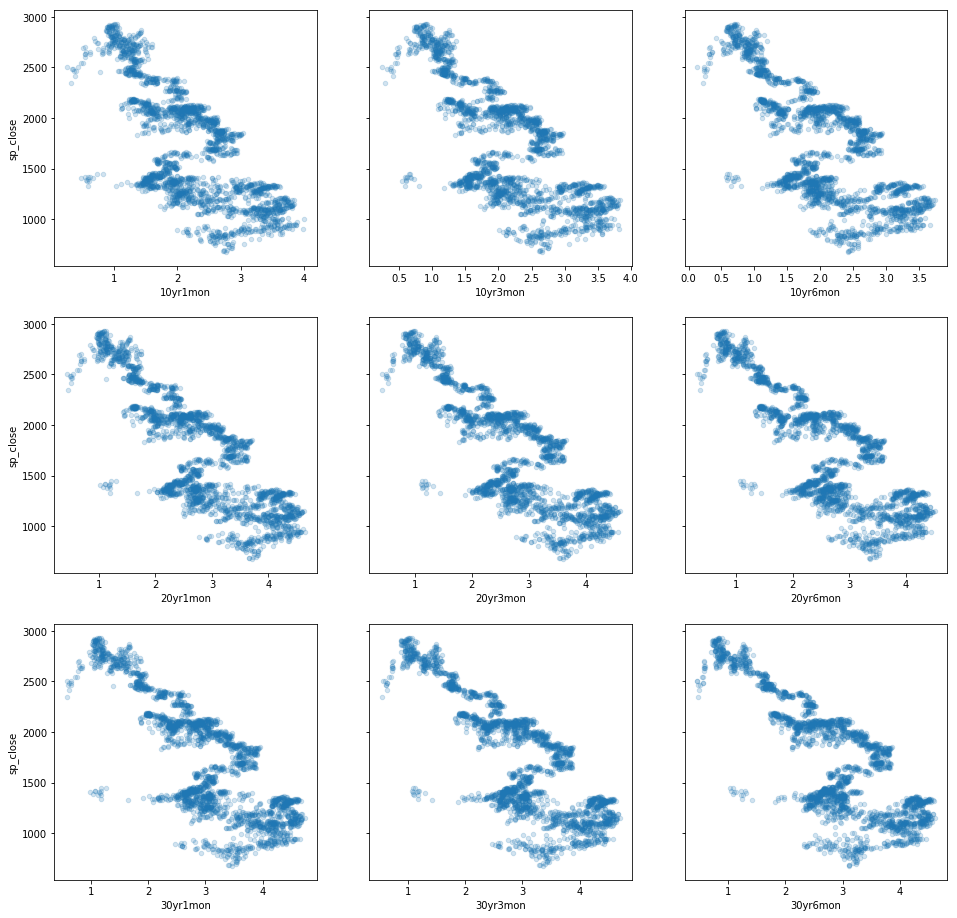

In [71]:
fig, axs = plt.subplots(3, 3, sharey=True)

data.plot(kind='scatter', x='10yr1mon', y='sp_close', alpha = 0.2, 
              ax=axs[0,0], figsize=(16, 16))
data.plot(kind='scatter', x='10yr3mon', y='sp_close', alpha = 0.2, 
              ax=axs[0,1], figsize=(16, 16))
data.plot(kind='scatter', x='10yr6mon', y='sp_close', alpha = 0.2, 
              ax=axs[0,2], figsize=(16, 16))
data.plot(kind='scatter', x='20yr1mon', y='sp_close', alpha = 0.2, 
              ax=axs[1,0], figsize=(16, 16))
data.plot(kind='scatter', x='20yr3mon', y='sp_close', alpha = 0.2, 
              ax=axs[1,1], figsize=(16, 16))
data.plot(kind='scatter', x='20yr6mon', y='sp_close', alpha = 0.2, 
              ax=axs[1,2], figsize=(16, 16))
data.plot(kind='scatter', x='30yr1mon', y='sp_close', alpha = 0.2, 
              ax=axs[2,0], figsize=(16, 16))
data.plot(kind='scatter', x='30yr3mon', y='sp_close', alpha = 0.2, 
              ax=axs[2,1], figsize=(16, 16))
data.plot(kind='scatter', x='30yr6mon', y='sp_close', alpha = 0.2, 
              ax=axs[2,2], figsize=(16, 16))


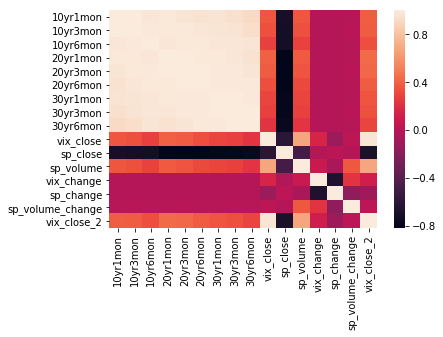

In [72]:
sns.heatmap(data.corr())

# seems like, for sp_close, relevant features are rates_diff, vix_close, and sp_volume (and possibly vix_close_2)

# below is data-engineering: rolling statistics



In [73]:
sp_monthly = data[['sp_close']].resample('M').mean()

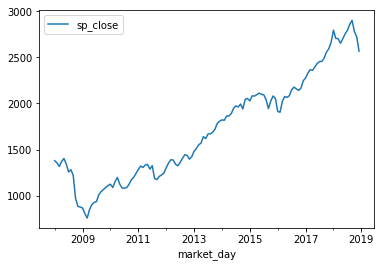

In [74]:
sp_monthly.plot()

In [75]:
sp_close_weekly_rolling = data['sp_close'].rolling(window=7, center=True).mean()

In [76]:
sp_close_weekly_rolling.head()

market_day
2018-01-03            NaN
2018-01-04            NaN
2018-01-05            NaN
2018-01-08    2742.141427
2018-01-09    2752.595703
Name: sp_close, dtype: float64

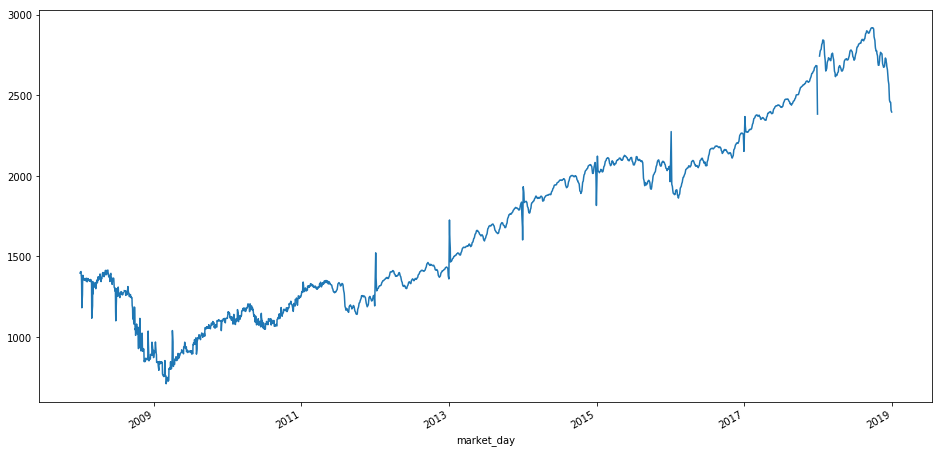

In [77]:
sp_close_weekly_rolling.plot(figsize=(16,8))

In [78]:
sp_volume_weekly_rolling = data['sp_volume'].rolling(window=7, center=True).mean()

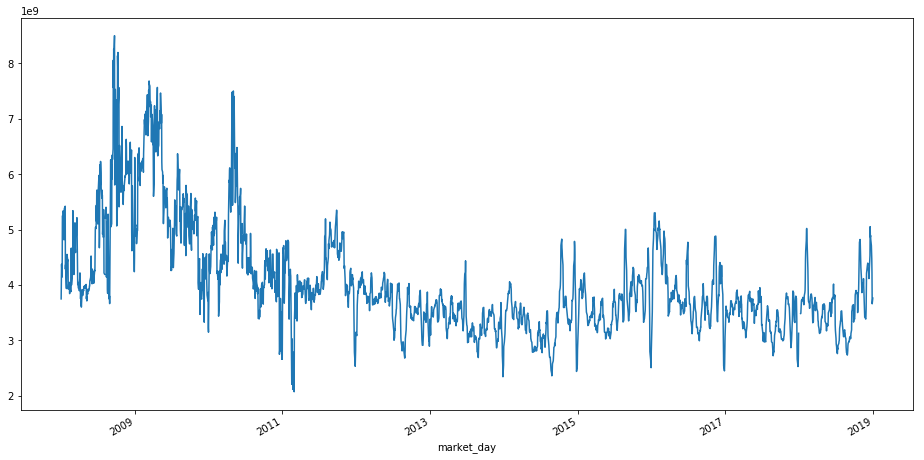

In [79]:
sp_volume_weekly_rolling.plot(figsize=(16,8))

In [80]:
vix_close_weekly_rolling = data['vix_close'].rolling(window=7, center=True).mean()

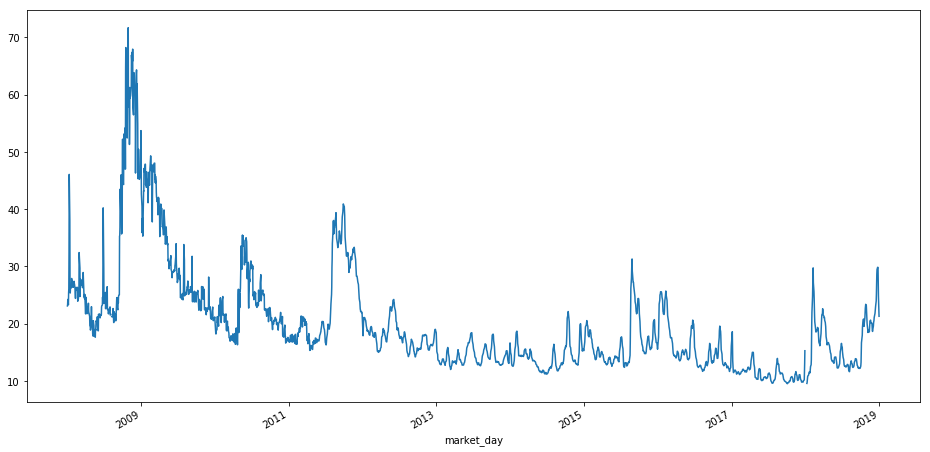

In [81]:
vix_close_weekly_rolling.plot(figsize=(16,8))

In [82]:
data_weekly = data.rolling(window=7, center=True).mean()

In [83]:
data_weekly = data_weekly.dropna(how='any')

In [84]:
data_monthly = data.rolling(window=30, center=True).mean()
data_monthly = data_monthly.dropna(how='any')

In [85]:
# a problem i haven't solved = rolling based on calendar days
# problem has been resolved below

data_7day = data.rolling(window=30, center=True).mean()
data_7day = data_7day.dropna(how='any')

data_30day = data.rolling(window=30, center=True).mean()
data_30day = data_30day.dropna(how='any')

In [ ]:
data_7day['10yr3mon']['2016'].tail(20)

data_7day['10yr3mon']['2017'].head(20)

#the first day of 2017 suddenly dropped to 1.145 from 1.955. 
#this is impossible based on the underlying daily rates.

#heading to [rolling documentation]
#(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) 
#to find the mechamism of rolling.

In [ ]:
test_data = pd.DataFrame({'sp':data.sp})

test_data.head()

test_data = test_data.resample('D').pad()

test_data.head(10)

test_data.rolling(window = 7).mean().dropna().plot()

data['count'] = np.arange(1,len(data) +1)

data.head()

# below is modeling on daily data







In [86]:
feature_cols = ['10yr1mon', '10yr3mon', '10yr6mon', '20yr1mon', 
                '20yr3mon', '20yr6mon','30yr1mon', '30yr3mon', '30yr6mon',
                'vix_close','sp_volume']

y = data['sp_close']
X = data[feature_cols]

In [87]:
X.describe()

,10yr1mon,10yr3mon,10yr6mon,20yr1mon,20yr3mon,20yr6mon,30yr1mon,30yr3mon,30yr6mon,vix_close,sp_volume
count,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2.734000e+03
mean,2.196324,2.147366,2.042191,2.782974,2.734016,2.628841,2.999221,2.950263,2.845088,19.725863,4.023844e+09
std,0.762566,0.773088,0.784303,0.948366,0.963507,0.979095,0.924043,0.944748,0.969890,9.621979,1.141021e+09
min,0.250000,0.240000,0.130000,0.430000,0.420000,0.310000,0.580000,0.550000,0.460000,9.140000,1.025000e+09
25%,1.590000,1.550000,1.470000,2.142500,2.100000,2.010000,2.450000,2.410000,2.302500,13.450000,3.321730e+09
50%,2.115000,2.100000,1.970000,2.720000,2.720000,2.645000,3.000000,2.980000,2.880000,16.910000,3.751200e+09
75%,2.710000,2.660000,2.590000,3.520000,3.450000,3.360000,3.670000,3.640000,3.580000,22.640000,4.462808e+09
max,4.010000,3.830000,3.740000,4.640000,4.600000,4.510000,4.730000,4.700000,4.610000,80.860000,1.145623e+10


In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# below is regular linear fit

In [90]:
lr = LinearRegression()

lr.fit(X_train,y_train)

lr_y_pred = lr.predict(X_test)


lr_RMSE = np.sqrt(metrics.mean_squared_error(y_test,lr_y_pred))

lr_RMSE


155.1791808959325

In [91]:
list(zip(feature_cols, lr.coef_))

[('10yr1mon', 568.776318281099),
 ('10yr3mon', 432.21900503444823),
 ('10yr6mon', 537.7973566002157),
 ('20yr1mon', -501.2819636447413),
 ('20yr3mon', -637.839273954074),
 ('20yr6mon', -532.2609253256225),
 ('30yr1mon', 70.96977099472501),
 ('30yr3mon', -65.58753931460602),
 ('30yr6mon', 39.99080931384624),
 ('vix_close', -13.971650474674659),
 ('sp_volume', -2.7856435667159652e-08)]

In [92]:
lr.score(X,y)

0.9226295325953885

# below is ss fit



In [93]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

ss_X_train = pd.DataFrame(ss.transform(X_train),index=X_train.index,columns=X_train.columns)
ss_X_test = pd.DataFrame(ss.transform(X_test),index=X_test.index,columns=X_test.columns)

ss_lr = LinearRegression()
ss_lr.fit(ss_X_train,y_train)
ss_lr_y_pred = lr.predict(ss_X_test)


ss_lr_RMSE = np.sqrt(metrics.mean_squared_error(y_test,ss_lr_y_pred))

ss_lr_score = ss_lr.score(X,y)

In [94]:
ss_lr_RMSE

1561.585531013592

In [95]:
list(zip(feature_cols, ss_lr.coef_))


[('10yr1mon', 461.01808095996626),
 ('10yr3mon', 317.7369930443738),
 ('10yr6mon', 418.1004427887224),
 ('20yr1mon', -503.6053891319442),
 ('20yr3mon', -605.4457555288686),
 ('20yr6mon', -511.09690699752446),
 ('30yr1mon', 60.926584197061814),
 ('30yr3mon', -52.35803190501385),
 ('30yr6mon', 34.1181448052965),
 ('vix_close', -133.25549540348212),
 ('sp_volume', -32.036591444659436)]

In [96]:
ss_lr_score

-5.643401104968385e+16

# below is ridge fit



In [97]:

from sklearn.linear_model import Ridge

ridgereg_1 = Ridge(alpha=0.1, normalize=True)
ridgereg_1.fit(X_train, y_train)
ridge_1_y_pred = ridgereg_1.predict(X_test)

ridge_RMSE_1 = np.sqrt(metrics.mean_squared_error(y_test, ridge_1_y_pred))

ridge_RMSE_1

206.3098723778427

In [98]:
list(zip(feature_cols, ridgereg_1.coef_))

[('10yr1mon', 190.89333483800547),
 ('10yr3mon', 148.22954418347868),
 ('10yr6mon', 103.72531065637126),
 ('20yr1mon', -105.79396443028773),
 ('20yr3mon', -126.55077431972948),
 ('20yr6mon', -148.10542487061792),
 ('30yr1mon', -97.76529923668878),
 ('30yr3mon', -118.50519137528144),
 ('30yr6mon', -138.48166664904653),
 ('vix_close', -20.26817764563693),
 ('sp_volume', -3.653164465665542e-08)]

In [99]:
# alpha = 0.5

ridgereg_5 = Ridge(alpha=0.5, normalize=True)
ridgereg_5.fit(X_train, y_train)
ridge_5_y_pred = ridgereg_5.predict(X_test)
ridge_RMSE_5 = np.sqrt(metrics.mean_squared_error(y_test, ridge_5_y_pred))

In [100]:
list(zip(feature_cols, ridgereg_5.coef_))

[('10yr1mon', 28.063751950274877),
 ('10yr3mon', 13.029126074300198),
 ('10yr6mon', -0.5542616033545019),
 ('20yr1mon', -60.637199736028585),
 ('20yr3mon', -67.90381925647263),
 ('20yr6mon', -74.15936103111548),
 ('30yr1mon', -64.02322708979338),
 ('30yr3mon', -70.75571706913885),
 ('30yr6mon', -75.70146360079109),
 ('vix_close', -14.175456188999451),
 ('sp_volume', -4.398621084996351e-08)]

In [101]:
ridgereg_8 = Ridge(alpha=0.8, normalize=True)
ridgereg_8.fit(X_train, y_train)
ridge_8_y_pred = ridgereg_8.predict(X_test)
ridge_RMSE_8 = np.sqrt(metrics.mean_squared_error(y_test, ridge_8_y_pred))

In [102]:
list(zip(feature_cols, ridgereg_8.coef_))

[('10yr1mon', 1.0797209578808737),
 ('10yr3mon', -8.478391607358452),
 ('10yr6mon', -16.09330282553362),
 ('20yr1mon', -55.21392551409332),
 ('20yr3mon', -59.60148102518307),
 ('20yr6mon', -62.71518371429317),
 ('30yr1mon', -56.600619327033264),
 ('30yr3mon', -60.49188316210028),
 ('30yr6mon', -62.49895845036879),
 ('vix_close', -11.838526580033264),
 ('sp_volume', -4.360315181845967e-08)]

In [103]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_y_pred = rfr.predict(X_test)
rfr_RMSE = np.sqrt(metrics.mean_squared_error(y_test, rfr_y_pred))

In [105]:
rfr_RMSE

65.8916195390967

In [106]:
rfr.score(X_test, y_test)

0.9857466253445605

# below is model comparison for daily data

In [107]:
frame_1 = pd.DataFrame(list(zip(feature_cols, lr.coef_)),columns=['feature', 'linear']).set_index('feature')
frame_2 = pd.DataFrame(list(zip(feature_cols, ss_lr.coef_)),columns=['feature', 'ss linear']).set_index('feature')
frame_3 = pd.DataFrame(list(zip(feature_cols, ridgereg_1.coef_)),columns=['feature', 'ridge .1']).set_index('feature')
frame_4 = pd.DataFrame(list(zip(feature_cols, ridgereg_5.coef_)),columns=['feature', 'ridge .5']).set_index('feature')
frame_5 = pd.DataFrame(list(zip(feature_cols, ridgereg_8.coef_)),columns=['feature', 'ridge .8']).set_index('feature')

coef_df = pd.concat([frame_1,#frame_2,
                     frame_3,frame_4,frame_5], axis=1)
coef_df = coef_df.transpose()
coef_df['RMSE'] = [lr_RMSE,#ss_lr_RMSE,
                    ridge_RMSE_1,ridge_RMSE_5,ridge_RMSE_8]

coef_df['score'] = [lr.score(X,y),#ss_lr.score(X,y),
                    ridgereg_1.score(X,y),ridgereg_5.score(X,y),ridgereg_8.score(X,y)]

In [108]:
coef_df.columns

Index(['10yr1mon', '10yr3mon', '10yr6mon', '20yr1mon', '20yr3mon', '20yr6mon',
       '30yr1mon', '30yr3mon', '30yr6mon', 'vix_close', 'sp_volume', 'RMSE',
       'score'],
      dtype='object', name='feature')

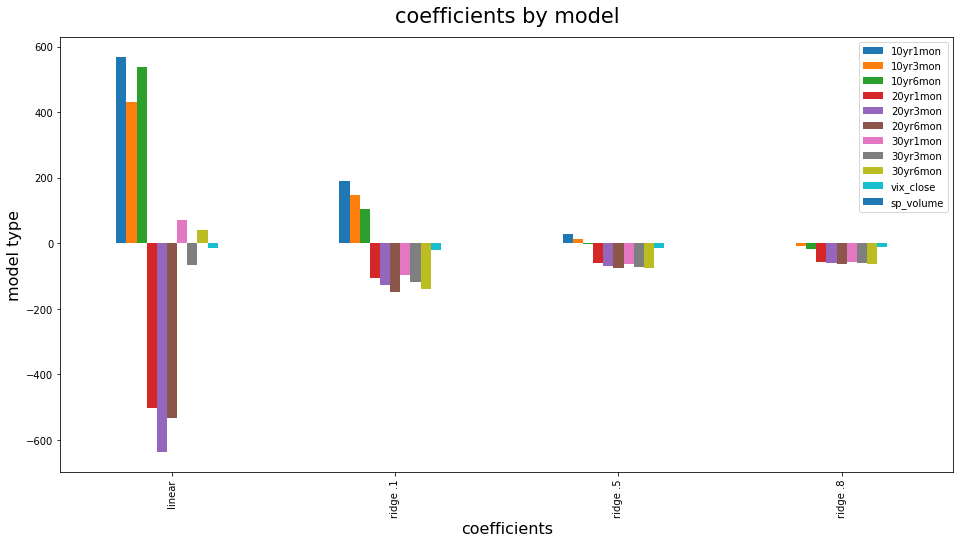

In [116]:
ax = coef_df[['10yr1mon', '10yr3mon', '10yr6mon', '20yr1mon', '20yr3mon', '20yr6mon',
       '30yr1mon', '30yr3mon', '30yr6mon', 'vix_close', 'sp_volume']].plot(kind='bar', figsize=(16,8));
ax.set_title('coefficients by model', fontsize=21, y=1.02); 
ax.legend(loc=1); 
ax.set_ylabel('model type', fontsize=16);
ax.set_xlabel('coefficients', fontsize=16);

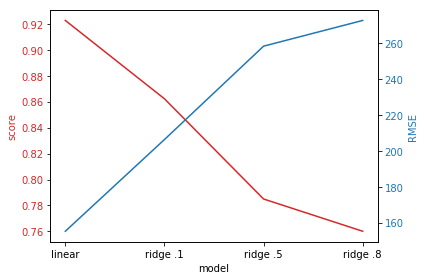

In [124]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('model')
ax1.set_ylabel('score', color=color)
ax1.plot(coef_df.index, coef_df.score, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('RMSE', color=color)  # we already handled the x-label with ax1
ax2.plot(coef_df.index, coef_df.RMSE, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
fig.savefig('foo.png')

# below is modeling on rolling data (weekly)



In [111]:
y = data_weekly['sp_close']
X = data_weekly[feature_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print ('below is linear regression')

w_lr = LinearRegression()

w_lr.fit(X_train,y_train)
w_lr_y_pred = w_lr.predict(X_test)

w_lr_RMSE = np.sqrt(metrics.mean_squared_error(y_test,w_lr_y_pred))

#------#

print ('below is ss_linear regression')

ss = StandardScaler()
ss.fit(X_train)

ss_X_train = pd.DataFrame(ss.transform(X_train),index=X_train.index,columns=X_train.columns)
ss_X_test = pd.DataFrame(ss.transform(X_test),index=X_test.index,columns=X_test.columns)

w_ss_lr = LinearRegression()
w_ss_lr.fit(ss_X_train,y_train)
w_ss_lr_y_pred = w_ss_lr.predict(w_ss_X_test)

w_ss_lr_RMSE = np.sqrt(metrics.mean_squared_error(y_test,w_ss_lr_y_pred))


#------#

print ('below is ridge regression alpha .1')

from sklearn.linear_model import Ridge

w_ridgereg_1 = Ridge(alpha=0.1, normalize=True)
w_ridgereg_1.fit(X_train, y_train)
w_ridge_1_y_pred = w_ridgereg_1.predict(X_test)

w_ridge_RMSE_1 = np.sqrt(metrics.mean_squared_error(y_test, w_ridge_1_y_pred))


#------#

print ('below is ridge regression alpha .5')

w_ridgereg_5 = Ridge(alpha=0.5, normalize=True)
w_ridgereg_5.fit(X_train, y_train)
w_ridge_5_y_pred = w_ridgereg_5.predict(X_test)
w_ridge_RMSE_5 = np.sqrt(metrics.mean_squared_error(y_test, w_ridge_5_y_pred))

#------#

print ('below is ridge regression alpha .8')

w_ridgereg_8 = Ridge(alpha=0.8, normalize=True)
w_ridgereg_8.fit(X_train, y_train)
w_ridge_8_y_pred = w_ridgereg_8.predict(X_test)
w_ridge_RMSE_8 = np.sqrt(metrics.mean_squared_error(y_test, w_ridge_8_y_pred))


below is linear regression
below is ss_linear regression


NameError: name 'w_ss_X_test' is not defined

In [ ]:
frame_1 = pd.DataFrame(list(zip(feature_cols, w_lr.coef_)),
                       columns=['feature', 'linear']).set_index('feature')
frame_2 = pd.DataFrame(list(zip(feature_cols, w_ss_lr.coef_)),
                       columns=['feature', 'ss linear']).set_index('feature')
frame_3 = pd.DataFrame(list(zip(feature_cols, w_ridgereg_1.coef_)),
                       columns=['feature', 'ridge .1']).set_index('feature')
frame_4 = pd.DataFrame(list(zip(feature_cols, w_ridgereg_5.coef_)),
                       columns=['feature', 'ridge .5']).set_index('feature')
frame_5 = pd.DataFrame(list(zip(feature_cols, w_ridgereg_8.coef_)),
                       columns=['feature', 'ridge .8']).set_index('feature')

w_coef_df = pd.concat([frame_1,frame_2,
                       frame_3,frame_4,frame_5], axis=1)
w_coef_df = w_coef_df.transpose()
w_coef_df['w_RMSE'] = [w_lr_RMSE,w_ss_lr_RMSE,
                      w_ridge_RMSE_1,w_ridge_RMSE_5,w_ridge_RMSE_8]

w_coef_df['w_score'] = [w_lr.score(X,y),w_ss_lr.score(X,y),
                    w_ridgereg_1.score(X,y),w_ridgereg_5.score(X,y),w_ridgereg_8.score(X,y)]

In [ ]:
w_coef_df

In [ ]:
ax = w_coef_df.plot(kind='bar', figsize=(16,8));
ax.set_title('coefficients and RMSE by model / weekly rolling', fontsize=21, y=1.02); 
ax.legend(loc=4); 
ax.set_ylabel('model type', fontsize=16);
ax.set_xlabel('coefficients and RMSE', fontsize=16);

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('model')
ax1.set_ylabel('score', color=color)
ax1.plot(w_coef_df.index, w_coef_df.w_score, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(w_coef_df.index, w_coef_df.w_RMSE, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# below is modeling on rolling data (monthly)

In [ ]:
y = data_monthly['sp_close']
X = data_monthly[feature_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print ('below is linear regression')

m_lr = LinearRegression()

m_lr.fit(X_train,y_train)
m_lr_y_pred = m_lr.predict(X_test)

m_lr_RMSE = np.sqrt(metrics.mean_squared_error(y_test,m_lr_y_pred))

#------#

print ('below is ss_linear regression')

ss = StandardScaler()
ss.fit(X_train)

ss_X_train = pd.DataFrame(ss.transform(X_train),index=X_train.index,columns=X_train.columns)
ss_X_test = pd.DataFrame(ss.transform(X_test),index=X_test.index,columns=X_test.columns)

m_ss_lr = LinearRegression()
m_ss_lr.fit(ss_X_train,y_train)
m_ss_lr_y_pred = m_ss_lr.predict(ss_X_test)

m_ss_lr_RMSE = np.sqrt(metrics.mean_squared_error(y_test,m_ss_lr_y_pred))


#------#

print ('below is ridge regression alpha .1')

from sklearn.linear_model import Ridge

m_ridgereg_1 = Ridge(alpha=0.1, normalize=True)
m_ridgereg_1.fit(X_train, y_train)
m_ridge_1_y_pred = m_ridgereg_1.predict(X_test)

m_ridge_RMSE_1 = np.sqrt(metrics.mean_squared_error(y_test, m_ridge_1_y_pred))


#------#

print ('below is ridge regression alpha .5')

m_ridgereg_5 = Ridge(alpha=0.5, normalize=True)
m_ridgereg_5.fit(X_train, y_train)
m_ridge_5_y_pred = m_ridgereg_5.predict(X_test)
m_ridge_RMSE_5 = np.sqrt(metrics.mean_squared_error(y_test, m_ridge_5_y_pred))

#------#

print ('below is ridge regression alpha .8')

m_ridgereg_8 = Ridge(alpha=0.8, normalize=True)
m_ridgereg_8.fit(X_train, y_train)
m_ridge_8_y_pred = m_ridgereg_8.predict(X_test)
m_ridge_RMSE_8 = np.sqrt(metrics.mean_squared_error(y_test, m_ridge_8_y_pred))


In [112]:
frame_1 = pd.DataFrame(list(zip(feature_cols, m_lr.coef_)),
                       columns=['feature', 'linear']).set_index('feature')
frame_2 = pd.DataFrame(list(zip(feature_cols, m_ss_lr.coef_)),
                       columns=['feature', 'ss linear']).set_index('feature')
frame_3 = pd.DataFrame(list(zip(feature_cols, m_ridgereg_1.coef_)),
                       columns=['feature', 'ridge .1']).set_index('feature')
frame_4 = pd.DataFrame(list(zip(feature_cols, m_ridgereg_5.coef_)),
                       columns=['feature', 'ridge .5']).set_index('feature')
frame_5 = pd.DataFrame(list(zip(feature_cols, m_ridgereg_8.coef_)),
                       columns=['feature', 'ridge .8']).set_index('feature')

m_coef_df = pd.concat([frame_1,#frame_2,
                       frame_3,frame_4,frame_5], axis=1)
m_coef_df = m_coef_df.transpose()
m_coef_df['m_RMSE'] = [m_lr_RMSE,#m_ss_lr_RMSE,
                      m_ridge_RMSE_1,m_ridge_RMSE_5,m_ridge_RMSE_8]


m_coef_df['m_score'] = [m_lr.score(X,y),#m_ss_lr.score(X,y),
                    m_ridgereg_1.score(X,y),w_ridgereg_5.score(X,y),m_ridgereg_8.score(X,y)]


NameError: name 'm_lr' is not defined

In [113]:
ax = m_coef_df.plot(kind='bar', figsize=(16,8));
ax.set_title('coefficients and RMSE by model / monthly rolling', fontsize=21, y=1.02); 
ax.legend(loc=4); 
ax.set_ylabel('coefficients and RMSE', fontsize=16);
ax.set_xlabel('model type', fontsize=16);

NameError: name 'm_coef_df' is not defined

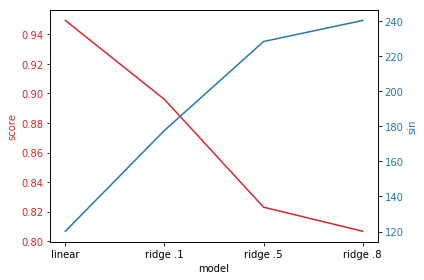

In [441]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('model')
ax1.set_ylabel('score', color=color)
ax1.plot(m_coef_df.index, m_coef_df.m_score, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(m_coef_df.index, m_coef_df.m_RMSE, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# below is data selection

In [471]:
cols=['daily','weekly','monthly']
performance_RMSE = pd.concat([coef_df['RMSE'],w_coef_df['w_RMSE'],m_coef_df['m_RMSE']],axis=1)
performance_RMSE.columns = cols


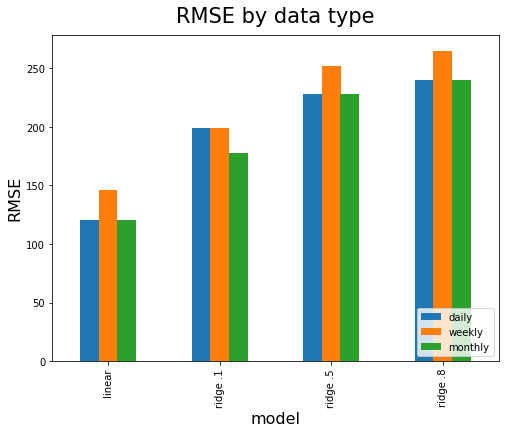

In [472]:
ax = performance_RMSE.plot(kind='bar', figsize=(8,6));
ax.set_title('RMSE by data type', fontsize=21, y=1.02); 
ax.legend(loc=4); 
ax.set_ylabel('RMSE', fontsize=16);
ax.set_xlabel('model', fontsize=16);

In [475]:
cols=['daily','weekly','monthly']
performance_RMSE = pd.concat([coef_df['score'],w_coef_df['w_score'],m_coef_df['m_score']],axis=1)
performance_RMSE.columns = cols

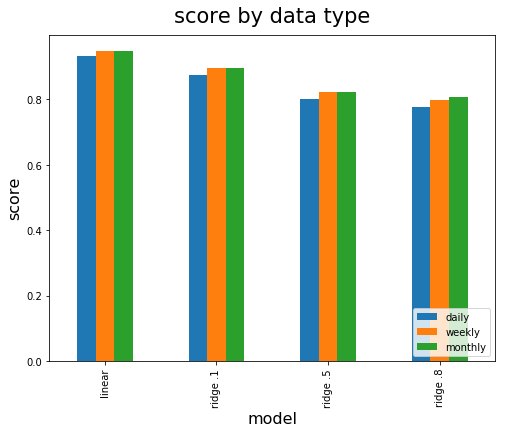

In [476]:
ax = performance_RMSE.plot(kind='bar', figsize=(8,6));
ax.set_title('score by data type', fontsize=21, y=1.02); 
ax.legend(loc=4); 
ax.set_ylabel('score', fontsize=16);
ax.set_xlabel('model', fontsize=16);

# seems like monthly data performs the best
# then move on to model selection

In [493]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

In [494]:
kf = model_selection.KFold(n_splits=5, shuffle=True)

print(np.sqrt(np.mean(-cross_val_score(m_lr, X, y, cv=kf, scoring='neg_mean_squared_error'))))
print(np.mean(cross_val_score(m_lr, X, y, cv=kf)))

125.34999293080702
0.949049855692661


In [621]:
kf = model_selection.KFold(n_splits=5, shuffle=True)

print(np.sqrt(np.sqrt(np.mean(-cross_val_score(m_ss_lr, X, y, cv=kf, scoring='neg_mean_squared_error')))))
print(np.mean(cross_val_score(m_ss_lr, X, y, cv=kf)))

12.552186701814941
0.9215924390493798


In [496]:
kf = model_selection.KFold(n_splits=5, shuffle=True)

print(np.sqrt(np.mean(-cross_val_score(m_ridgereg_1, X, y, cv=kf, scoring='neg_mean_squared_error'))))
print(np.mean(cross_val_score(m_ridgereg_1, X, y, cv=kf)))

178.93720564082912
0.8955809723352843


In [497]:
kf = model_selection.KFold(n_splits=5, shuffle=True)

print(np.sqrt(np.mean(-cross_val_score(m_ridgereg_5, X, y, cv=kf, scoring='neg_mean_squared_error'))))
print(np.mean(cross_val_score(m_ridgereg_5, X, y, cv=kf)))

231.57714191988788
0.82585104740949


In [498]:
kf = model_selection.KFold(n_splits=5, shuffle=True)

print(np.sqrt(np.mean(-cross_val_score(m_ridgereg_8, X, y, cv=kf, scoring='neg_mean_squared_error'))))
print(np.mean(cross_val_score(m_ridgereg_8, X, y, cv=kf)))

245.53750493113017
0.802974038350003


# below is 2019 data

In [213]:
url = 'https://data.treasury.gov/feed.svc/DailyTreasuryYieldCurveRateData?$filter=year(NEW_DATE)%20eq%202019'
r = requests.get(url)
jsdata = xmltodict.parse(r.content)
length = len(jsdata['feed']['entry'])

data_dict_2019 = {}

for x in range(1,length):
    rates = []
    date = jsdata['feed']['entry'][x]['content']['m:properties']['d:NEW_DATE']['#text']
    one_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_1MONTH']['#text']
    three_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_3MONTH']['#text']
    six_mon = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_6MONTH']['#text']
    ten_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_10YEAR']['#text']
    twenty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_20YEAR']['#text']
    thirty_yr = jsdata['feed']['entry'][x]['content']['m:properties']['d:BC_30YEAR']['#text']
    rates.append(date)
    rates.append(one_mon)
    rates.append(three_mon)
    rates.append(six_mon)
    rates.append(ten_yr)
    rates.append(twenty_yr)
    rates.append(thirty_yr)
   
    data_dict_2019[x] = rates

data_2019 = pd.DataFrame.from_dict(data_dict_2018,orient='index',columns=['date','one_mon','three_mon','six_mon',
                                                                     'ten_yr','twenty_yr','thirty_yr'])

In [214]:
data_2019.head()

,date,one_mon,three_mon,six_mon,ten_yr,twenty_yr,thirty_yr
1,2018-01-03T00:00:00,1.29,1.41,1.59,2.44,2.62,2.78
2,2018-01-04T00:00:00,1.28,1.41,1.6,2.46,2.62,2.79
3,2018-01-05T00:00:00,1.27,1.39,1.58,2.47,2.64,2.81
4,2018-01-08T00:00:00,1.3,1.45,1.6,2.49,2.65,2.81
5,2018-01-09T00:00:00,1.27,1.44,1.6,2.55,2.72,2.88
